In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_open = pd.read_csv('/workspaces/codespaces-jupyter/notebooks/housing.csv')
data_open.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **EDA data train :**
- sebaran nilai data, rata-rata, q3, q1, dst 
- tipe data
- nilai duplikat
- kolom atau baris kosong
- nilai yang saling berhubungan

In [2]:
# melihat jenis data tiap feature untuk menentukan perlakuan analisis yang tepat

data_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
data_open.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


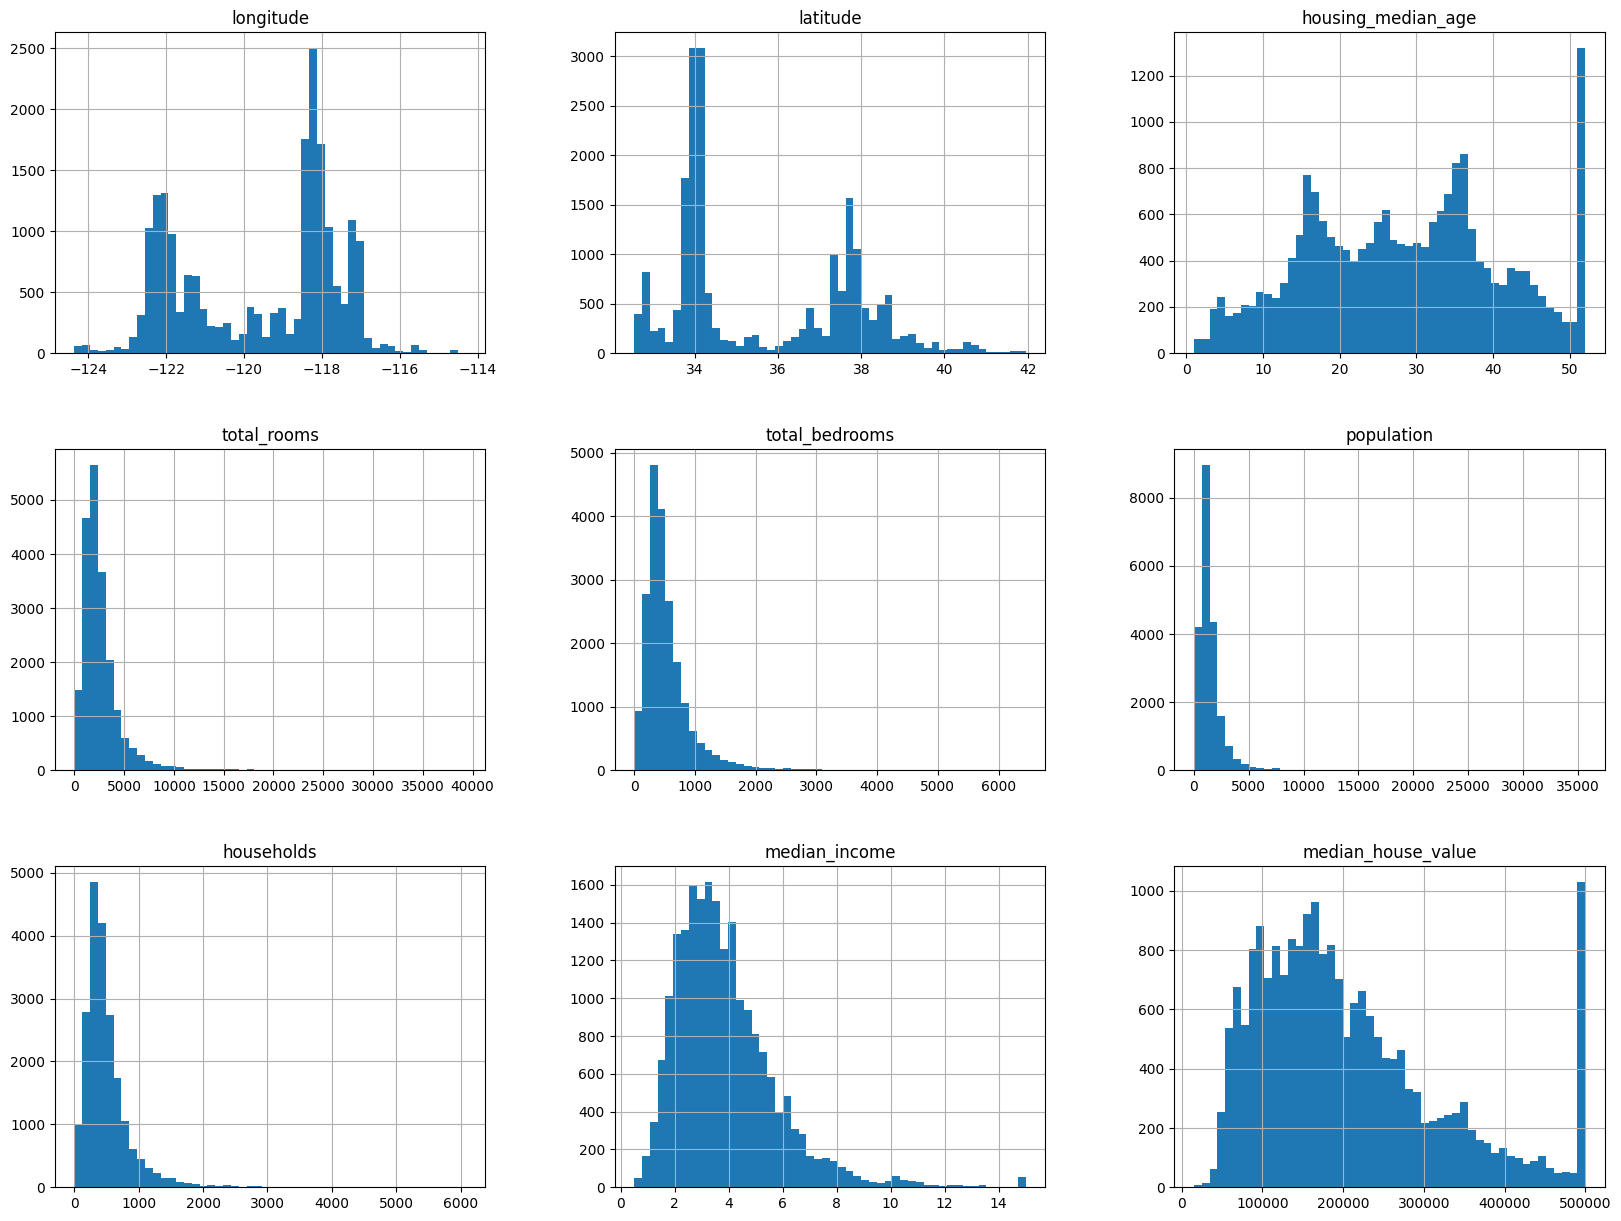

<Figure size 640x480 with 0 Axes>

In [4]:
fig = data_open.hist(bins=50, figsize=(20,15))
plt.figure()
plt.show()

***berdasarkan bagan di atas didapat bahwa pendapatan rata-rata bisa menjadi atribut penting untuk memprediksi harga rata-rata rumah. Oleh karena itu kita akan membuat fitur baru yang disebut income_kategori yang didapat dari data median_income, di mana terdapat 5 kelas dengan rentang atau selisih 1.5 tiap kelasnya.***

<AxesSubplot: >

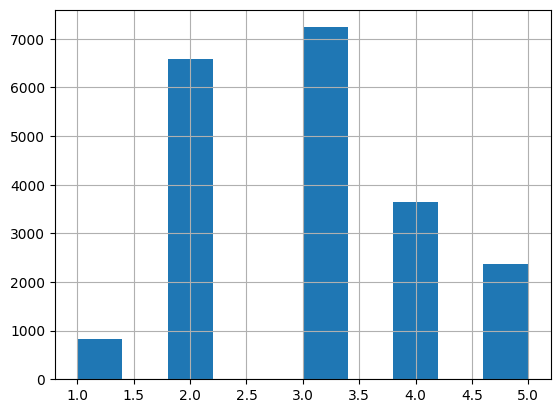

In [5]:
data_open["income_kategori"] = pd.cut(data_open["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
data_open.head()
data_open["income_kategori"].hist()

In [6]:
data_open.income_kategori.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_kategori, dtype: int64

***berdasarkan perhitungan value_counts pada variabel income_kategori, didapat kategori dengan jumlah terbanyak adalah kategori 3 dan jumlah terendah terdapat pada kategori 1***

### Selanjutnya kita akan melakukan stratified sampling berdasarkan kategori pendapatan

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=1,test_size = 0.2,random_state = 42)
s

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [8]:
for train_index, test_index in s.split(data_open, data_open['income_kategori']):
    train = data_open.loc[train_index]
    test = data_open.loc[test_index]
test['income_kategori'].value_counts()/len(test)   

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_kategori, dtype: float64

In [9]:
print(f'train: {train.shape}')
print(f'test: {test.shape}')

train: (16512, 11)
test: (4128, 11)


In [10]:
for set_ in (train, test):
    set_.drop('income_kategori',axis=1,inplace=True)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

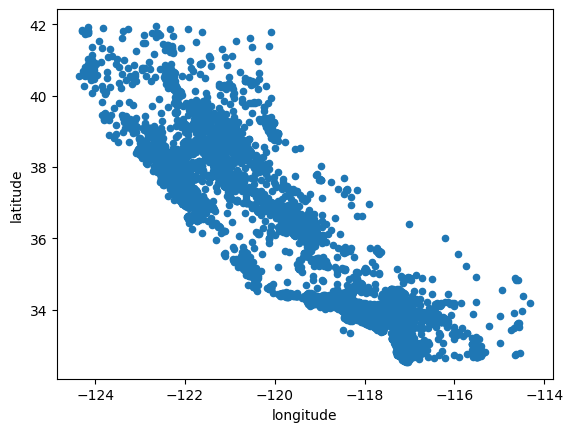

In [11]:
# melihat peta kepadatan rumah berdasarkan data house_california

trcopy = train.copy()
train.plot(kind="scatter", x="longitude", y="latitude")

***Gambar di atas menggambarkan sebidang garis lintang dan garis bujur yang membentuk seperti California.
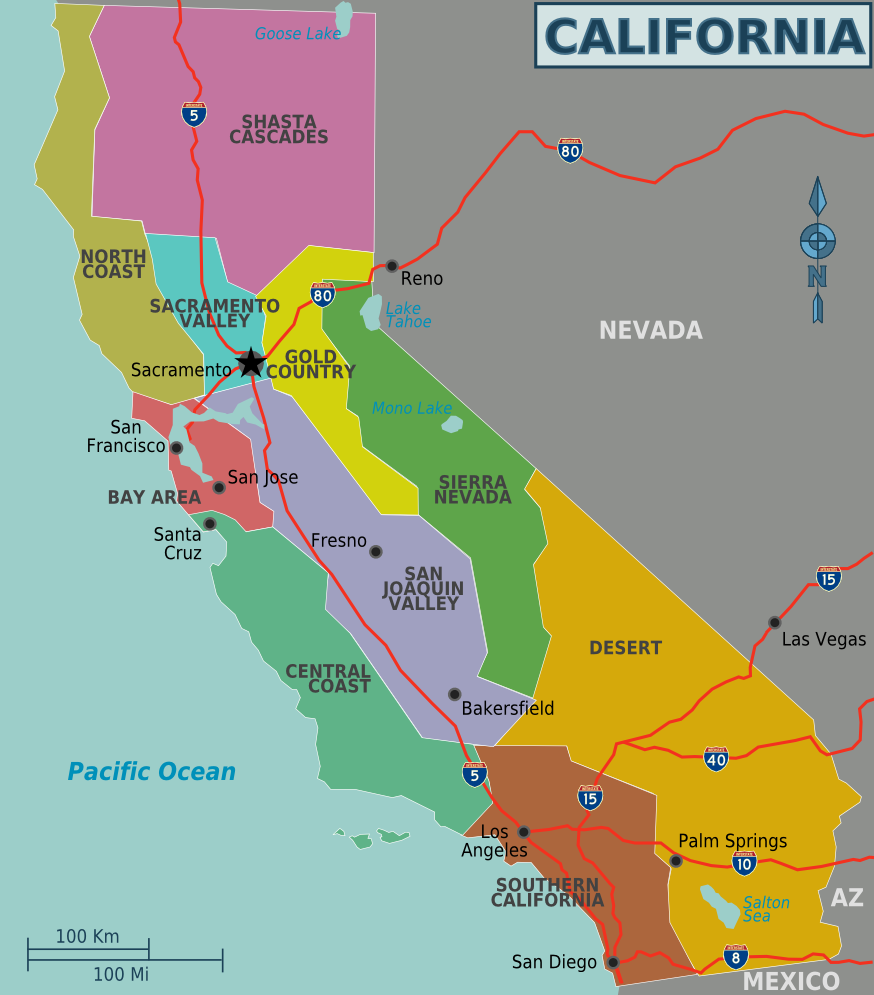***

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

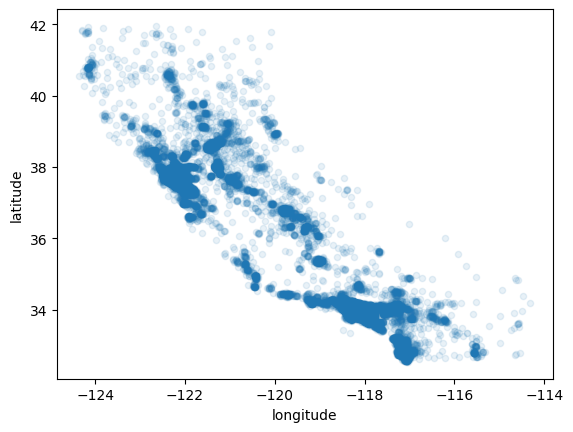

In [12]:
trcopy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

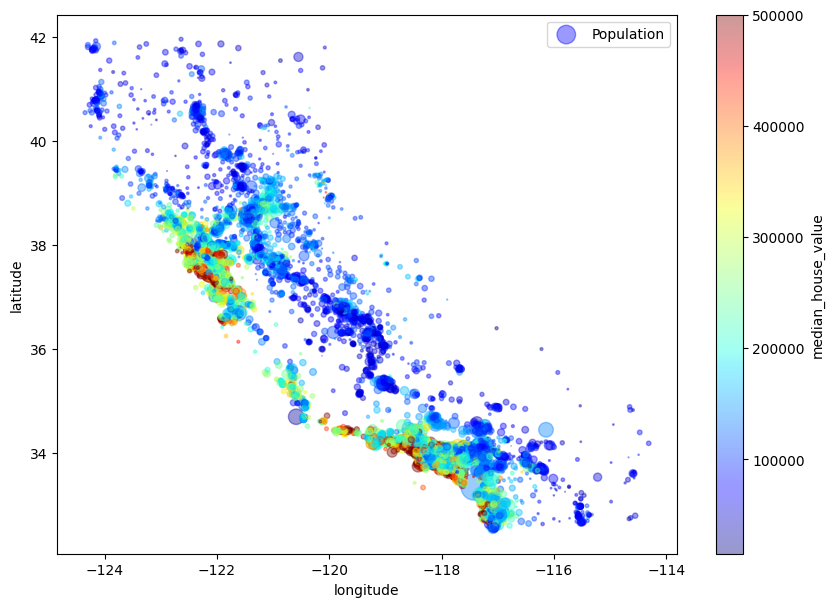

In [13]:
trcopy.plot(kind = "scatter",x='longitude',y='latitude' , alpha = 0.4,
       s=trcopy['population']/100,label = 'Population', figsize = (10,7),
       c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()

***Gambar ini mmenunjukkan bahwa harga rumah sangat terkait dengan lokasi (mis. Dekat dengan laut) dan kepadatan penduduk.***

In [14]:
train_copy_corr = trcopy.corr()
train_copy_corr

/tmp/ipykernel_6126/3855911064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_copy_corr = trcopy.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


**Visualisasi data train untuk melihat hubungan antar variabel**

<AxesSubplot: >

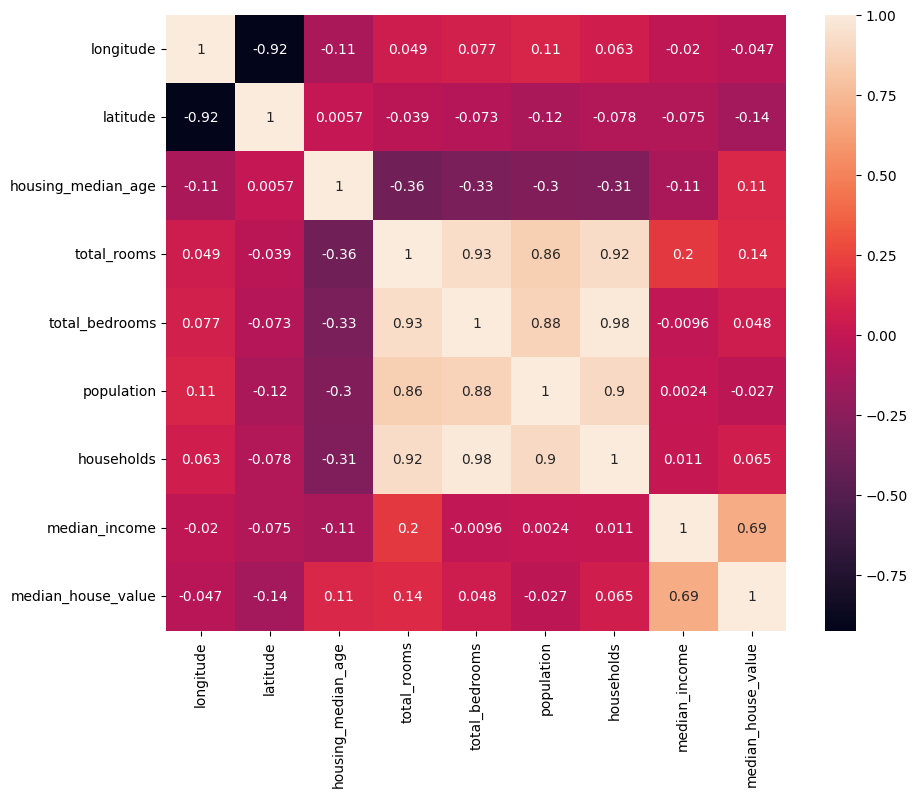

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(train_copy_corr, annot=True)

In [16]:
train_copy_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Dari data tersebut terlihat bahwa setiap atribut berkorelasi dengan nilai median rumah dan memplot beberapa atribut yang menjanjikan yang tampaknya paling berkorelasi dengan nilai median income. Pendapatan rata-rata berkorelasi paling menjanjikan dengan nilai rumah rata-rata, sehingga diplot secara terpisah.

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

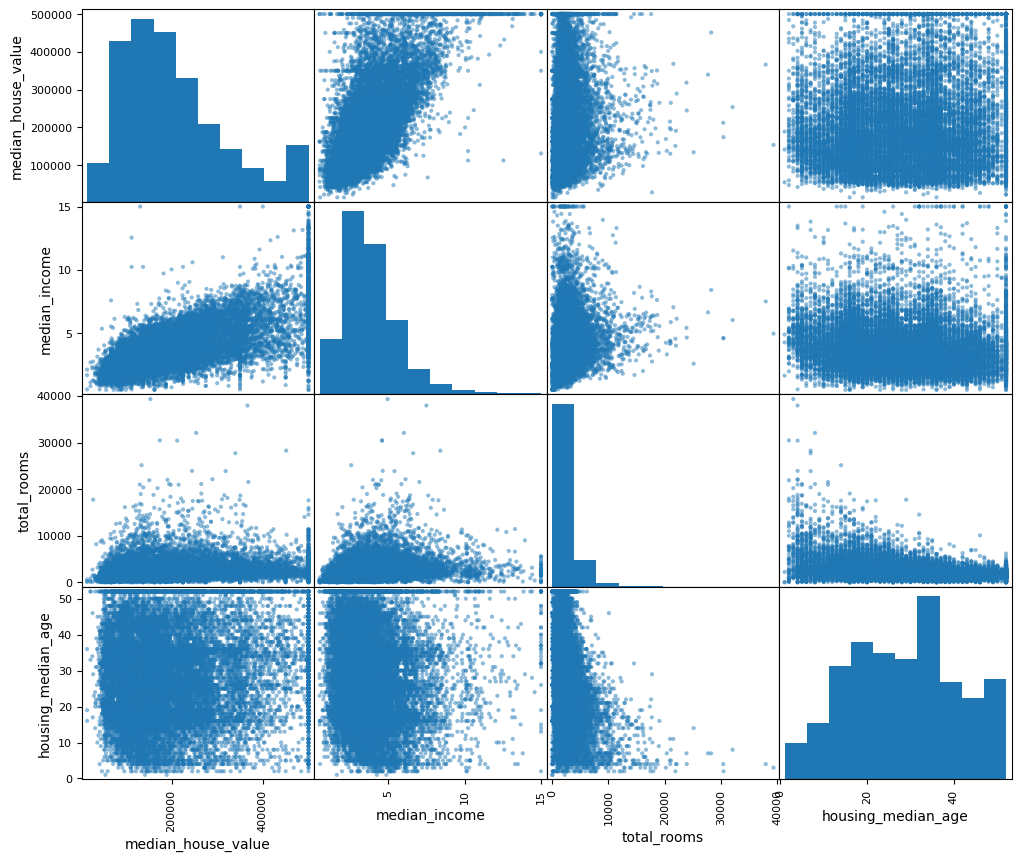

In [17]:
from pandas.plotting import scatter_matrix

a = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(trcopy[a],figsize = (12,10))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

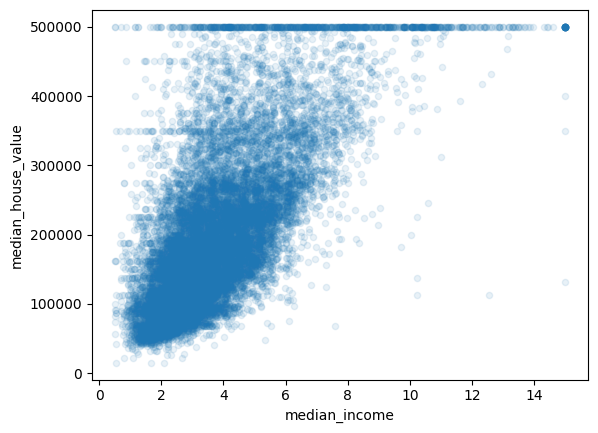

In [18]:
trcopy.plot(kind = 'scatter',x='median_income',y='median_house_value',alpha=0.1)

# ADDING COMBINATION OF ATTRIBUTES

Beberapa fitur seperti jumlah kamar di suatu distrik tidak terlalu berguna tanpa diketahui berapa jumlah rumah tangga di sana. Oleh karena itu, jumlah kamar per rumah tangga mungkin menjadi parameter yang tepat. Untuk itu kita dapat menggabungkan beberapa atribut lagi dengan cara yang menambahkan 3 fitur:

> Kamar per rumah tangga

> Kamar tidur per rumah tangga

> Populasi per rumah tangga

In [19]:
data_open["rooms_per_household"] = data_open["total_rooms"]/data_open["households"]
data_open["bedrooms_per_room"] = data_open["total_bedrooms"]/data_open["total_rooms"]
data_open["population_per_household"]=data_open["population"]/data_open["households"]
data_open.corr()['median_house_value'].sort_values(ascending = False)

/tmp/ipykernel_6126/860363360.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_open.corr()['median_house_value'].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [20]:
print(f'jumlah baris dan kolom data_ope: {data_open.shape}')

jumlah baris dan kolom data_ope: (20640, 14)


/tmp/ipykernel_6126/3639657329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_open.corr(), annot=True)


<AxesSubplot: >

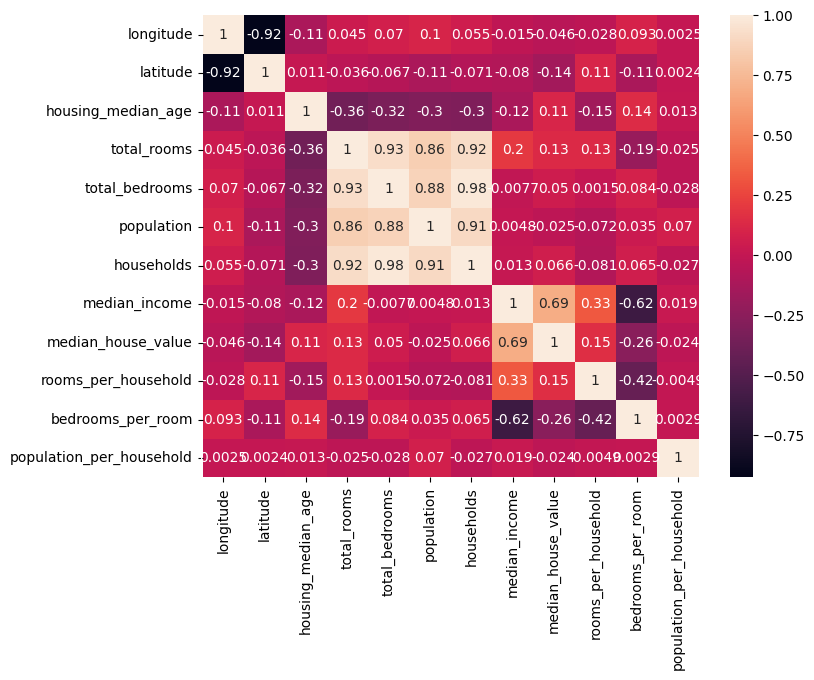

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data_open.corr(), annot=True)

Dari matriks korelasi, kami mengamati bahwa kamar tidur per ruang jauh lebih berkorelasi dengan nilai rata-rata rumah daripada jumlah total ruangan atau kamar tidur. Rupanya rumah dengan rasio kamar tidur/ruangan yang lebih rendah cenderung lebih mahal. Jumlah kamar per rumah tangga juga lebih informatif daripada jumlah total ruangan di suatu distrik. Ini menunjukkan semakin besar rumahnya, semakin mahal harganya.

### Kita akan kembali ke cleaning training set  dan memisahkan prediktor dan nilai target.

In [22]:
# menghapus kolom 'median_house_value' untuk data train 
df_baru = train.drop('median_house_value', axis = 1)

# feature target 'median_house_value' dari data train yang digunakan sebagai variabel y_train
feature = train['median_house_value'].copy()

### DATA CLEANING

Pertama, kami menangani nilai yang hilang di total kamar tidur dengan mengganti setiap nilai yang hilang dengan nilai median dari atribut.

In [23]:
from sklearn.impute import SimpleImputer


# membersihkan data yang kosong (missing value)
imputer = SimpleImputer(strategy='median')

# hapus variable yang tidak diperlukan 
## hapus ocean proximity yang merupakan data tipe kategorik
df_ = df_baru.drop('ocean_proximity',axis=1) 
df_transform = pd.DataFrame(imputer.fit_transform(df_), columns=df_.columns, index=df_.index)
df_transform.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [24]:
print(f'jumlah baris dan kolom df_transform: {df_transform.shape}')

jumlah baris dan kolom df_transform: (16512, 8)


In [25]:
from sklearn.preprocessing import OrdinalEncoder

# preprocessing data kategorikal untuk variabel 'ocean_proximity' yang diambil dari dataset df_baru
ordinal_encoder = OrdinalEncoder()
dfc = df_baru[['ocean_proximity']]
dfc_encoded = ordinal_encoder.fit_transform(dfc)
dfc_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [26]:
dfc_encoded.shape

(16512, 1)

Kedekatan wilayah dengan wilayah laut (ocean_proximity) diubah dari teks menjadi angka. Sekarang, kita akan membuat transformasi yang disesuaikan. Transformasi ini akan menambahkan kolom bedrooms_per_room, rooms_per_household dan population_per_household. Variabel add_bedrooms_per_room akan mengatur penambahan kolom bedrooms_per_room. Hal ini pada dasarnya adalah hyperparameter.

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
room, bedroom, population, household = 3, 4, 5, 6

class TambahFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, room] / X[:, household]
        population_per_household = X[:, population] / X[:, household]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom] / X[:, room]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            np.c_[X,rooms_per_household,population_per_household]

In [28]:
adding = TambahFeatures(add_bedrooms_per_room=False)
atribut_extra = adding.transform(df_baru.values)

### CREATING A TRANSFORMATION PIPELINE

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# preprocessing data numeric
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('adder', TambahFeatures()),('std_scaler', StandardScaler()),])

# fit transform dari data tanpa variabel categorik
dfn_transform = num_pipeline.fit_transform(df_)

# preprocessing data categoric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

atribut_numerik= list(df_)
atribut_kategori = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num', num_pipeline, atribut_numerik),('cat', OneHotEncoder(), atribut_kategori),])
data_prepared = full_pipeline.fit_transform(df_baru)

## LINEAR REGRESSOR

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_prepared,feature)

LinearRegression()

In [31]:
df_tes = df_baru.iloc[:5]
df_label = feature.iloc[:5]
test_data = full_pipeline.transform(df_tes)

print("Predictions: ", lin_reg.predict(test_data))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [32]:
print("Actual Labels: ", list(df_label))

Actual Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(lin_reg.predict(test_data),df_label)
print("RMSE (Linear Regressor) = ",np.sqrt(mse))

RMSE (Linear Regressor) =  47159.22387406725


Karena RMSE cukup besar, model tersebut memiliki data pelatihan yang kurang sesuai. Untuk itu kita akan gunakan model yang lebih kompleks seperti DecisionTree untuk melihat bagaimana hasilnya.

## DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(data_prepared, feature)
tree_pred = model_dt.predict(data_prepared)
mse = mean_squared_error(feature,tree_pred)
print("RMSE (Decision Tree = )", np.sqrt(mse))

RMSE (Decision Tree = ) 0.0


***Kita bisa melihat modelnya sangat tidak cocok dengan data pelatihan***

## CROSS VALIDATION

In [35]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(model_dt, data_prepared, feature, scoring="neg_mean_squared_error", cv=10)
dt_rmse = np.sqrt(-dt_scores)

In [36]:
def disp_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

In [37]:
disp_scores(dt_rmse)

Scores: [72324.53521365 70708.95599162 69043.53287445 70663.93492192
 69584.80853314 76418.78016891 69512.02564613 74322.39692285
 68531.57834138 69777.05880235]
Mean: 71088.76074164006
Standard deviation: 2406.4090230001657


In [38]:
lin_scores = cross_val_score(lin_reg, data_prepared, feature, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
disp_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818062


***Dari sini, kami mengamati bahwa Decision Tree sangat overfit sehingga kinerjanya lebih buruk daripada Linear Regressor.***

In [39]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(data_prepared, feature)
rf_score = cross_val_score(model_rf, data_prepared, feature, scoring="neg_mean_squared_error",cv=10)
disp_scores(np.sqrt(-rf_score))

Scores: [51825.70235741 48823.31030237 47084.22893166 52238.30128293
 47199.15875459 51893.15359137 52359.66597367 49849.32433
 48735.27753409 53907.88751473]
Mean: 50391.6010572813
Standard deviation: 2249.1457051235716


## HYPERPARAMETER TUNING

In [40]:
from sklearn.model_selection import GridSearchCV


param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_ = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_.fit(data_prepared, feature)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
grid_.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [42]:
grid_.get_params    

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')>

FINAL MODEL

In [43]:
final_model = grid_.best_estimator_
X_test = test.drop("median_house_value", axis=1)
y_test = test["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [44]:
final_mse

2255958081.8709803

In [45]:
final_rmse

47496.92707819086

***Untuk mengetahui seberapa tepat estimasi tersebut, kami menghitung interval kepercayaan 95% untuk kesalahan generalisasi.***

In [46]:
from scipy import stats
confidence = 0.95
sq_error = (final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence,len(sq_error)-1,loc=sq_error.mean(),scale = stats.sem(sq_error)))

array([45531.81408744, 49383.90496557])

In [47]:
data_final = pd.Series(final_predictions, index=X_test.index)
data_final

5241     487184.066667
17352    232386.666667
3505     218236.666667
7777     165100.000000
14155    235273.400000
             ...      
12182    162690.000000
7275     122350.000000
17223    368336.800000
10786    282853.433333
3965     224803.333333
Length: 4128, dtype: float64

In [48]:
data_final = pd.DataFrame(data_final, columns=['predict_final'])
data_final

,predict_final
5241,487184.066667
17352,232386.666667
3505,218236.666667
7777,165100.000000
14155,235273.400000
...,...
12182,162690.000000
7275,122350.000000
17223,368336.800000
10786,282853.433333


In [50]:
hasil_akhir = X_test
hasil_akhir['prediction_final'] = data_final
hasil_akhir

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,prediction_final
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,487184.066667
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN,232386.666667
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN,218236.666667
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN,165100.000000
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN,235273.400000
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,<1H OCEAN,162690.000000
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,<1H OCEAN,122350.000000
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,<1H OCEAN,368336.800000
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,<1H OCEAN,282853.433333
